# Text Embedding Model Comparison
This notebook compares TF-IDF and doc2Vec text vectorisation methods using the intra-cluster similarity metric. 

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.metrics.pairwise import linear_kernel

import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/train/data/raw/sample_10000.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,13558,Australia,"A simple, lemony style that would work best wi...",NaN,84,9.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Ghost Gum 2000 Chardonnay (South Eastern Austr...,Chardonnay,Ghost Gum
1,20765,Greece,This wine has an element of candied watermelon...,NaN,82,15.0,Peloponnese,NaN,NaN,Susan Kostrzewa,@suskostrzewa,My Big Fat Greek Wine 2010 Cabernet Sauvignon ...,Cabernet Sauvignon,My Big Fat Greek Wine
2,69500,France,"Made from 40% Syrah, 40% Grenache and 20% Mour...",NaN,84,17.0,Languedoc-Roussillon,Languedoc,NaN,Lauren Buzzeo,@laurbuzz,Domaine de Nizas 2015 Rosé (Languedoc),Rosé,Domaine de Nizas
3,50569,France,"The original Dagueneau domaine, Berthiers has ...",Saint-Andelain,90,24.0,Loire Valley,Pouilly-Fumé,NaN,Roger Voss,@vossroger,Domaine des Berthiers 2012 Saint-Andelain (Po...,Sauvignon Blanc,Domaine des Berthiers
4,109485,France,"Certified French organic with this vintage, th...",NaN,89,18.0,Bordeaux,Cadillac Côtes de Bordeaux,NaN,Roger Voss,@vossroger,Château Brethous 2012 Cadillac Côtes de Bordeaux,Bordeaux-style Red Blend,Château Brethous


In [8]:
df['description'].str.split().str.len().max()

98

In [120]:
df = df[(df['variety'].notna()) & (df['region_1'].notna())]
df['variety_region'] = df[['variety', 'region_1']].agg('-'.join, axis=1)

In [121]:
top_prov = df['variety_region'].value_counts().nlargest(10).index.tolist()
data_subset = df[df['variety_region'].isin(top_prov)]
data_subset = data_subset.reset_index(drop=True)

In [122]:
top_prov

['Cabernet Sauvignon-Napa Valley',
 'Nebbiolo-Barolo',
 'Pinot Noir-Willamette Valley',
 'Pinot Noir-Russian River Valley',
 'Champagne Blend-Champagne',
 'Malbec-Mendoza',
 'Chardonnay-Russian River Valley',
 'Pinot Noir-Sonoma Coast',
 'Tempranillo-Rioja',
 'Riesling-Alsace']

In [123]:
train_set = data_subset[['description','title']]
corpus = train_set['description'].tolist()

In [124]:
def plot_tsne(x,y):
    feat_cols = [ 'embedding'+str(i) for i in range(x.shape[1]) ]
    df_embed = pd.DataFrame(x,columns=feat_cols)
    df_embed['y'] = y
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(x)
    
    df_embed['size'] = 0
    df_embed.loc[df_embed['y'] != 'unknown','size'] = 10
    
    df_embed['tsne-2d-one'] = tsne_results[:,0]
    df_embed['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        size="size",
    #     palette=sns.color_palette("hls"),
        data=df_embed,
        legend="full",
        alpha=0.8
    )

In [125]:
def plot_pca(x,y):
    feat_cols = [ 'embedding'+str(i) for i in range(x.shape[1]) ]
    df_embed = pd.DataFrame(x,columns=feat_cols)
    df_embed['y'] = y
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(x)
    df_embed['pca-one'] = pca_result[:,0]
    df_embed['pca-two'] = pca_result[:,1]
    
    df_embed['size'] = 0
    df_embed.loc[df_embed['y'] != 'unknown','size'] = 10
    
    
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="y",
#         size="size",
    #     palette=sns.color_palette("hls"),
        data=df_embed,
        legend="full",
        alpha=0.8
    )

## TF-IDF Model

In [126]:
len(corpus)

924

In [127]:
data_subset.shape

(924, 15)

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
X = vectorizer.fit_transform(corpus)

In [130]:
x = X.toarray()
y = data_subset['variety_region']

# plot_tsne(x,y)

In [131]:
x.shape

(924, 3691)

In [132]:
y = data_subset['variety_region']

In [133]:
y

0                      Nebbiolo-Barolo
1                      Riesling-Alsace
2                      Nebbiolo-Barolo
3      Chardonnay-Russian River Valley
4       Cabernet Sauvignon-Napa Valley
                    ...               
919     Cabernet Sauvignon-Napa Valley
920                     Malbec-Mendoza
921    Pinot Noir-Russian River Valley
922    Chardonnay-Russian River Valley
923    Pinot Noir-Russian River Valley
Name: variety_region, Length: 924, dtype: object

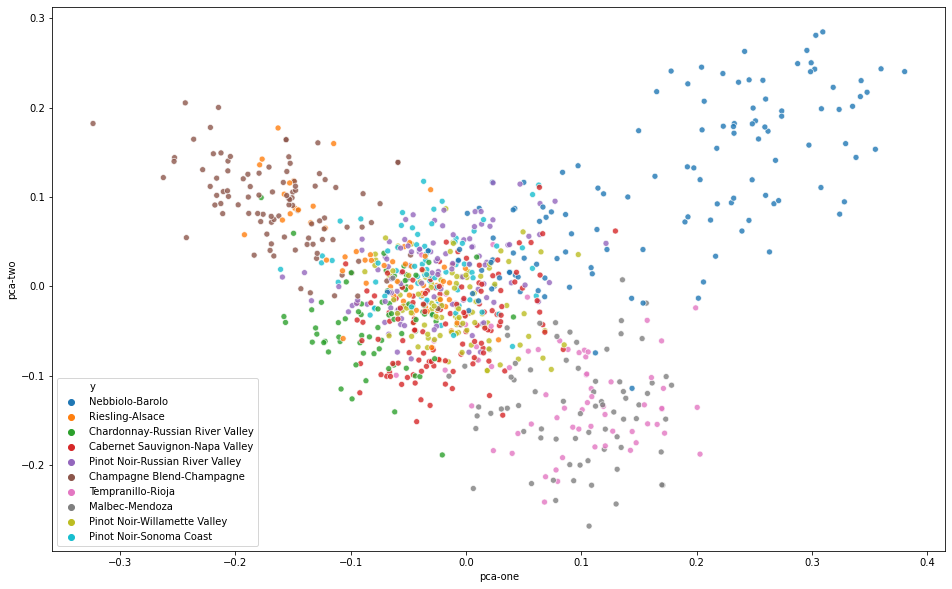

In [134]:
plot_pca(x,y)

In [14]:
y

array(['Pinot Noir-Willamette Valley', 'Cabernet Sauvignon-Napa Valley',
       'Malbec-Mendoza', ..., 'Pinot Noir-Sonoma Coast', 'Malbec-Mendoza',
       'Malbec-Mendoza'], dtype=object)

In [136]:
labels = data_subset['variety_region'].unique()
for l in labels:
    idx = data_subset[data_subset['variety_region'] == l].index.to_numpy()
    x_cluster = x[idx]
    cluster_mean = np.mean(x_cluster, axis=0)
    out = np.mean(cosine_similarity([cluster_mean], x_cluster).flatten())
    print(l, out)
    

Nebbiolo-Barolo 0.3007850475742034
Riesling-Alsace 0.276162068824362
Chardonnay-Russian River Valley 0.25327909306881874
Cabernet Sauvignon-Napa Valley 0.23417811491683038
Pinot Noir-Russian River Valley 0.2183075642596504
Champagne Blend-Champagne 0.3001139575037485
Tempranillo-Rioja 0.29409145443233087
Malbec-Mendoza 0.2815271616341078
Pinot Noir-Willamette Valley 0.1983226443187262
Pinot Noir-Sonoma Coast 0.23926714859530487


In [137]:
l = 'Pinot Noir-Willamette Valley'
idx = data_subset[data_subset['variety_region'] == l].index.to_numpy()


In [138]:
data_subset[data_subset['variety_region'] == l]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,variety_region
23,84568,US,"Here's a bowl full of fresh purple berries, pl...",Estate,89,20.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,David Hill 2012 Estate Pinot Noir (Willamette ...,Pinot Noir,David Hill,Pinot Noir-Willamette Valley
43,67529,US,More full-bodied than the past couple of vinta...,Estate,87,30.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Willamette Valley Vineyards 2012 Estate Pinot ...,Pinot Noir,Willamette Valley Vineyards,Pinot Noir-Willamette Valley
44,35360,US,"This is a barrel selection, and as such, may b...",Reserve,92,100.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Elk Cove 2014 Reserve Pinot Noir (Willamette V...,Pinot Noir,Elk Cove,Pinot Noir-Willamette Valley
49,100037,US,"A fine, elegant Pinot Noir, still in its infan...",Premier Cuvée,90,48.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Archery Summit 2008 Premier Cuvée Pinot Noir (...,Pinot Noir,Archery Summit,Pinot Noir-Willamette Valley
50,24931,US,"This is the winery's third vintage, and they c...",Paciência,88,35.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Coelho 2006 Paciência Pinot Noir (Willamette V...,Pinot Noir,Coelho,Pinot Noir-Willamette Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,86059,US,Somewhat tight and in need of time in the bott...,Roosevelt Vineyard,89,48.0,Oregon,Willamette Valley,Willamette Valley,Joe Czerwinski,@JoeCz,Elk Cove 1998 Roosevelt Vineyard Pinot Noir (W...,Pinot Noir,Elk Cove,Pinot Noir-Willamette Valley
876,18816,US,"A tight, rich, dense package, wrapped in just ...",Reserve,91,36.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,Cristom 1998 Reserve Pinot Noir (Willamette Va...,Pinot Noir,Cristom,Pinot Noir-Willamette Valley
881,78988,US,"This very limited block selection is too thin,...",Tallulah's Run Reserve,85,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Coeur de Terre 2011 Tallulah's Run Reserve Pin...,Pinot Noir,Coeur de Terre,Pinot Noir-Willamette Valley
889,92884,US,"In this much-celebrated well-ripened vintage, ...",Shea Vineyard,92,65.0,Oregon,Willamette Valley,NaN,Paul Gregutt,@paulgwine,Penner-Ash 2014 Shea Vineyard Pinot Noir,Pinot Noir,Penner-Ash,Pinot Noir-Willamette Valley


In [139]:
x_cluster = x[idx]
cluster_mean = np.mean(x_cluster, axis=0)
out = np.mean(cosine_similarity([cluster_mean], x_cluster).flatten())
print(l, out)

Pinot Noir-Willamette Valley 0.1983226443187262


## Doc2Vec

In [140]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [141]:
corpus_lower = [_d.lower() for i, _d in enumerate(corpus)]

In [142]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(corpus)]

In [143]:
max_epochs = 150
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha


/opt/anaconda3/envs/cloudwine/lib/python3.8/site-packages/gensim/models/doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


<ipython-input-143-17037a545dda>:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  epochs=model.iter)


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [144]:
docvecs = model.docvecs['0']
for i in range(1,len(corpus)):
    docvecs = np.vstack((docvecs, model.docvecs[str(i)]))
docvecs

array([[ 1.6521585e+00, -3.9079862e+00,  9.6743989e-01, ...,
        -3.0455008e+00,  1.9382136e+00, -1.6097316e+00],
       [ 1.5530276e+00, -3.1620865e-03, -1.3675191e+00, ...,
         1.1632651e+00,  2.5661335e+00, -2.4451458e+00],
       [ 3.1570587e-02, -4.1388276e-01, -8.0497706e-01, ...,
        -8.5654020e-01,  2.4317713e+00, -1.0100696e+00],
       ...,
       [ 2.4706122e-01, -1.1991755e+00,  1.8308178e+00, ...,
         8.2033527e-01,  1.0537964e+00, -3.4418327e-01],
       [-2.1841264e+00, -2.1168048e-02,  9.0367746e-01, ...,
         1.6734879e+00,  2.3398051e+00,  4.0507358e-01],
       [ 9.8170757e-01,  2.3797648e+00,  2.0972767e-01, ...,
        -7.3418158e-01,  1.2371783e+00, -5.7263440e-01]], dtype=float32)

In [145]:
docvecs.shape

(924, 100)

In [146]:
labels = data_subset['variety_region'].unique()
for l in labels:
    idx = data_subset[data_subset['variety_region'] == l].index.to_numpy()
    x_cluster = docvecs[idx]
    cluster_mean = np.mean(x_cluster, axis=0)
    out = np.mean(cosine_similarity([cluster_mean], x_cluster).flatten())
    print(l, out)
    

Nebbiolo-Barolo 0.62306565
Riesling-Alsace 0.6324706
Chardonnay-Russian River Valley 0.63051456
Cabernet Sauvignon-Napa Valley 0.5944183
Pinot Noir-Russian River Valley 0.5873206
Champagne Blend-Champagne 0.61089015
Tempranillo-Rioja 0.6029961
Malbec-Mendoza 0.61819035
Pinot Noir-Willamette Valley 0.6112642
Pinot Noir-Sonoma Coast 0.5880939


In [147]:
x = docvecs
y = data_subset['variety_region'].to_numpy()


In [148]:
# plot_tsne(x,y)

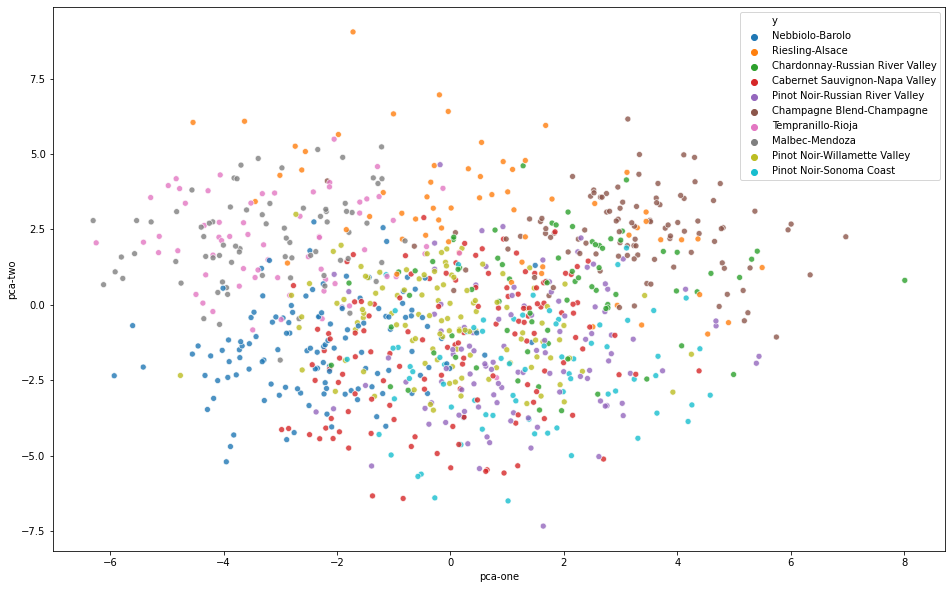

In [149]:
plot_pca(x,y)

In [150]:
data_subset.shape

(924, 15)

In [27]:
data_subset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,variety_region
0,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Pinot Noir-Willamette Valley
1,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Cabernet Sauvignon-Napa Valley
2,17,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino,Malbec-Mendoza
3,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,Pinot Noir-Sonoma Coast
4,41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,Pinot Noir-Willamette Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859,129892,Italy,"Classic Sangiovese aromas of red berry, culina...",NaN,91,72.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,La Mannella 2012 Brunello di Montalcino,Sangiovese,La Mannella,Sangiovese-Brunello di Montalcino
11860,129906,US,Pencil shaving and graphite notes lend a class...,NaN,91,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Conn Creek 2013 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Conn Creek,Cabernet Sauvignon-Napa Valley
11861,129912,US,From the Ranch House block of the famous viney...,Durell Vineyard,91,55.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Dunstan 2014 Durell Vineyard Pinot Noir (Sonom...,Pinot Noir,Dunstan,Pinot Noir-Sonoma Coast
11862,129917,Argentina,"This dark, meaty Malbec has some Agrelo fruit ...",Piedra Negra,91,40.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,J. & F. Lurton 2004 Piedra Negra Malbec (Mendoza),Malbec,J. & F. Lurton,Malbec-Mendoza


In [ ]:
Nebbiolo-Barolo 0.3007850475742034
Riesling-Alsace 0.276162068824362
Chardonnay-Russian River Valley 0.25327909306881874
Cabernet Sauvignon-Napa Valley 0.23417811491683038
Pinot Noir-Russian River Valley 0.2183075642596504
Champagne Blend-Champagne 0.3001139575037485
Tempranillo-Rioja 0.29409145443233087
Malbec-Mendoza 0.2815271616341078
Pinot Noir-Willamette Valley 0.1983226443187262
Pinot Noir-Sonoma Coast 0.23926714859530487

In [ ]:
Nebbiolo-Barolo 0.62306565
Riesling-Alsace 0.6324706
Chardonnay-Russian River Valley 0.63051456
Cabernet Sauvignon-Napa Valley 0.5944183
Pinot Noir-Russian River Valley 0.5873206
Champagne Blend-Champagne 0.61089015
Tempranillo-Rioja 0.6029961
Malbec-Mendoza 0.61819035
Pinot Noir-Willamette Valley 0.6112642
Pinot Noir-Sonoma Coast 0.5880939

In [166]:
labels = labels[:5]

In [167]:
tf_idf = [ 0.3007850475742034, 0.276162068824362, 0.25327909306881874, 0.23417811491683038, 0.2183075642596504]
doc_vec = [0.62306565, 0.6324706, 0.63051456, 0.5944183, 0.5873206]

In [168]:
x = np.arange(len(labels))
width = 0.35

In [173]:
labels = ['Nebbiolo-Barolo',
'Riesling-Alsace',
'Chardonnay-Russian River Valley',
'Cabernet Sauvignon-Napa Valley',
'Pinot Noir-Russian River Valley']

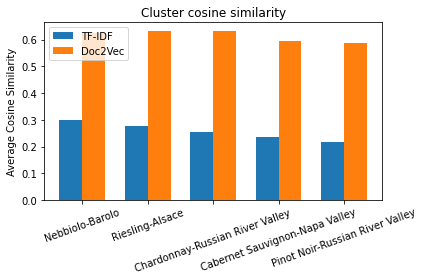

In [178]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tf_idf, width, label='TF-IDF')
rects2 = ax.bar(x + width/2, doc_vec, width, label='Doc2Vec')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Cosine Similarity')
ax.set_title('Cluster cosine similarity')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20)
ax.legend()

fig.tight_layout()

plt.show()